#Preprocessing Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import tensorflow.keras as keras
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.optimizers import Adam, SGD, Adagrad, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
import pickle as p
import glob
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Input, Masking

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SimpleRNN, Masking, Input, Activation
from tensorflow.keras.activations import softmax
import tensorflow as tf

In [4]:
path = "/content/drive/MyDrive/DLA6/Handwriting_Data01"
os.listdir(path)

['bA', 'chA', 'ai', 'tA', 'dA']

In [5]:
def read_data(path):
    tr_path = path+'/train/'
    test_path = path+'/dev/'
    train = pd.concat([pd.read_csv(tr_path+i, sep=" ", header=None) for i in os.listdir(tr_path)])
    test = pd.concat([pd.read_csv(test_path+i, sep=" ", header=None) for i in os.listdir(test_path)])
    return train, test

In [6]:
tr_ai, test_ai= read_data(path+'/ai')
tr_bA, test_bA= read_data(path+'/bA')
tr_chA, test_chA= read_data(path+'/chA')
tr_dA, test_dA= read_data(path+'/dA')
tr_tA, test_tA= read_data(path+'/tA')

In [7]:
tr_chA.drop(0, inplace=True, axis=1)
tr_dA.drop(0, inplace=True, axis=1)
tr_ai.drop(0, inplace=True, axis=1)
tr_bA.drop(0, inplace=True, axis=1)
tr_tA.drop(0, inplace=True, axis=1)

In [8]:
test_chA.drop(0, inplace=True, axis=1)
test_dA.drop(0, inplace=True, axis=1)
test_ai.drop(0, inplace=True, axis=1)
test_bA.drop(0, inplace=True, axis=1)
test_tA.drop(0, inplace=True, axis=1)

In [9]:
tr_ai=tr_ai.dropna(axis=1,how='all')
test_ai=test_ai.dropna(axis=1,how='all')
tr_bA=tr_bA.dropna(axis=1,how='all')
test_bA=test_bA.dropna(axis=1,how='all')
tr_chA=tr_chA.dropna(axis=1,how='all')
test_chA=test_chA.dropna(axis=1,how='all')
tr_dA=tr_dA.dropna(axis=1,how='all')
test_dA=test_dA.dropna(axis=1,how='all')
tr_tA=tr_tA.dropna(axis=1,how='all')
test_tA=test_tA.dropna(axis=1,how='all')

In [10]:
#import pandas as pd
tr_data = pd.concat([tr_chA, tr_tA, tr_ai, tr_bA, tr_dA])
test_data = pd.concat([test_chA, test_tA, test_ai, test_bA, test_dA])
# save to training.csv file
#tr_data.to_csv('training.csv', index=False)

In [11]:
nan_list=[np.nan]*test_data.shape[0]

In [12]:
for i in range(test_data.shape[1],tr_data.shape[1]+1):
    test_data[i]=nan_list

In [13]:
tr_data=tr_data.replace(np.nan,0)
test_data=test_data.replace(np.nan,0)

In [14]:
df =tr_data
# Create an empty list to store the x, y point pairs
tr = []


# Loop over each row in the DataFrame
for index, row in df.iterrows():
    # Create a list to store the x, y pairs for this row
    point_row = []
    
    
    # Loop over each value in the row, skipping the first column
    for i in range(1, len(row), 2):
        # Get the x, y pair for this point
        x = row[i]
        y = row[i+1]
        l=[]
        #print(type(x))
        l.append(x)
        l.append(y)
        l=np.array(l,dtype=np.float32)
        # Add the x, y pair to the list for this row
        point_row.append(l)
    
    # Add the list of x, y pairs for this row to the points list
    tr.append(point_row)

# Create a new DataFrame from the points list
train = pd.DataFrame(tr)

# Save the new DataFrame to a CSV file
#df_points.to_csv('testHw.csv', index=False, header=False)

In [15]:
df =test_data
# Create an empty list to store the x, y point pairs
tst = []


# Loop over each row in the DataFrame
for index, row in df.iterrows():
    # Create a list to store the x, y pairs for this row
    point_row = []
    
    
    # Loop over each value in the row, skipping the first column
    for i in range(1, len(row), 2):
        # Get the x, y pair for this point
        x = row[i]
        y = row[i+1]
        l=[]
        #print(type(x))
        l.append(x)
        l.append(y)
        l=np.array(l,dtype=np.float32)
        # Add the x, y pair to the list for this row
        point_row.append(l)
    
    # Add the list of x, y pairs for this row to the points list
    tst.append(point_row)

# Create a new DataFrame from the points list
test = pd.DataFrame(tst)

# Save the new DataFrame to a CSV file
#df_points.to_csv('testHw.csv', index=False, header=False)

import pandas as pd
label = []
for i in range(len(test_ai)):
    label.append('ai')
for i in range(len(test_bA)):
    label.append('bA')
for i in range(len(test_chA)):
    label.append('chA')
for i in range(len(test_dA)):
    label.append('dA')
for i in range(len(test_tA)):
    label.append('tA')

label_df = pd.DataFrame({'label': label})
label_df['label_index'] = label_df['label'].replace({'ai': 0, 'bA': 1, 'chA': 2, 'dA': 3, 'tA': 4})
label_df.to_csv('/content/drive/MyDrive/Test_label1.csv', index=False)

In [16]:
# Load the CSV file into a pandas DataFrame
trainLabel = pd.read_csv('/content/drive/MyDrive/DLA6/label1.csv')

# Drop a specific label (column)
trainLabel = trainLabel.drop('label', axis=1)
# Save the modified DataFrame back to a new CSV file
#trainLabel.to_csv('/content/drive/MyDrive/modified_file_train.csv', index=False)

In [17]:
# Load the CSV file into a pandas DataFrame
Test_label = pd.read_csv('/content/drive/MyDrive/DLA6/Test_label1.csv')

# Drop a specific label (column)
Test_label = Test_label.drop('label', axis=1)

In [18]:
yt=trainLabel.values
ytest=Test_label.values

In [19]:
tensortest=tf.convert_to_tensor(tst)

In [20]:
tensortrain=tf.convert_to_tensor(tr)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_3 (Masking)         (None, 161, 2)            0         
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 128)               16768     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 5)                 645       
                                                                 
Total params: 17,413
Trainable params: 17,413
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
3/3 [==============================] - 2s 158ms/step - loss: 1.6900 - accuracy: 0.1855
Epoch 2/1000
3/3 [==============================] - 1s 164ms/step - loss: 1.6326 -

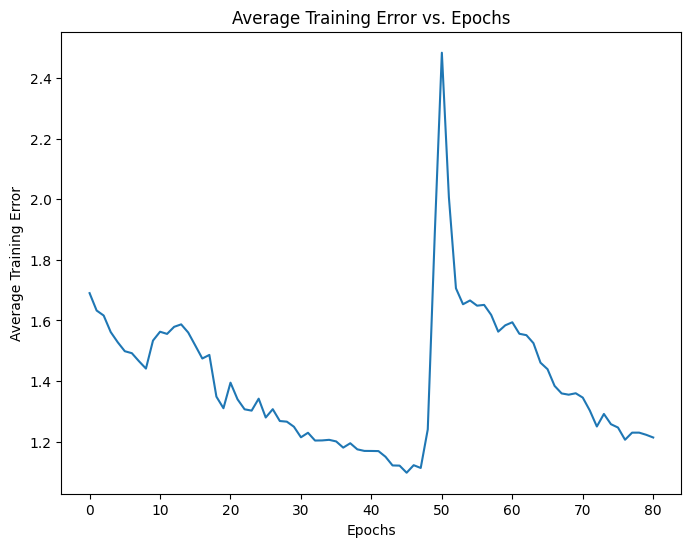

In [24]:
es1= EarlyStopping(monitor='loss',min_delta=0.0001, patience=35,verbose=1)
#Model Architecture 1
mask_value=0.0
model1 = Sequential()
model1.add(Masking(mask_value=mask_value, input_shape=(161, 2)))
model1.add(SimpleRNN(units=128,return_sequences=False))
model1.add(Dropout(0.2))
model1.add(Dense(units=5, activation='softmax'))
model1.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
model1.summary()
history1=model1.fit(tensortrain, yt, callbacks=[es1],epochs=1000, batch_size=128)

#save Model weights
model1.save('/content/drive/MyDrive/DLA6/CV_SAVE_Model/14.h5')

#Evaluating the model
print('\nEvaluation of model on train data:')
trainAcc1=model1.evaluate(x=tensortrain,y=yt,batch_size=1, verbose="auto",callbacks=None)
print(model1.metrics_names)
print(trainAcc1)
print('\nEvaluation of model on test data:')
testAcc1=model1.evaluate(x=tensortest, y=ytest, batch_size=1, verbose="auto",callbacks=None)
print(model1.metrics_names)
print(testAcc1)


#Confusion Matrix
print('\nPredictions for test data:')
testProb1=model1.predict(tensortest, batch_size=1, verbose="auto", callbacks=None)
pred1=np.argmax(testProb1,axis=1)
confusionMatrix1=tf.math.confusion_matrix(ytest,pred1)
print(confusionMatrix1)


#Average Training Error vs. Epochs plotting
plt.figure(figsize=(8, 6))
#plt.plot(history8.history['accuracy'])
plt.plot(history1.history['loss'])
plt.title('Average Training Error vs. Epochs')
plt.ylabel('Average Training Error')
plt.xlabel('Epochs')
plt.show()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_2 (Masking)         (None, 161, 2)            0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 128)               16768     
                                                                 
 dense_2 (Dense)             (None, 5)                 645       
                                                                 
Total params: 17,413
Trainable params: 17,413
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
3/3 [==============================] - 2s 162ms/step - loss: 1.6160 - accuracy: 0.2232
Epoch 2/1000
3/3 [==============================] - 0s 153ms/step - loss: 1.5702 - accuracy: 0.2464
Epoch 3/1000
3/3 [==============================] - 1s 159ms/step - loss: 1.5494 - accuracy: 0.2783
Epoch 4/1000
3

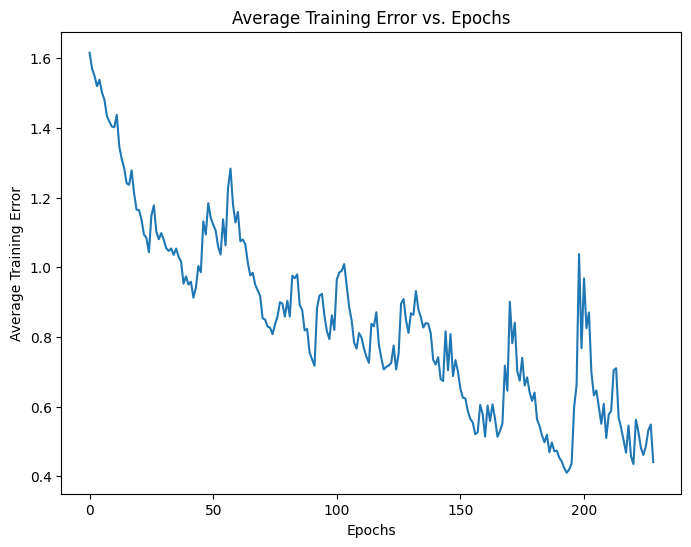

In [23]:
es1= EarlyStopping(monitor='loss',min_delta=0.0001, patience=35,verbose=1)
#Model Architecture 1
mask_value=0.0
model1 = Sequential()
model1.add(Masking(mask_value=mask_value, input_shape=(161, 2)))
model1.add(SimpleRNN(units=128,return_sequences=False))
model1.add(Dense(units=5, activation='softmax'))
model1.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
model1.summary()
history1=model1.fit(tensortrain, yt, callbacks=[es1],epochs=1000, batch_size=128)

#save Model weights
model1.save('/content/drive/MyDrive/DLA6/CV_SAVE_Model/12.h5')

#Evaluating the model
print('\nEvaluation of model on train data:')
trainAcc1=model1.evaluate(x=tensortrain,y=yt,batch_size=1, verbose="auto",callbacks=None)
print(model1.metrics_names)
print(trainAcc1)
print('\nEvaluation of model on test data:')
testAcc1=model1.evaluate(x=tensortest, y=ytest, batch_size=1, verbose="auto",callbacks=None)
print(model1.metrics_names)
print(testAcc1)


#Confusion Matrix
print('\nPredictions for test data:')
testProb1=model1.predict(tensortest, batch_size=1, verbose="auto", callbacks=None)
pred1=np.argmax(testProb1,axis=1)
confusionMatrix1=tf.math.confusion_matrix(ytest,pred1)
print(confusionMatrix1)


#Average Training Error vs. Epochs plotting
plt.figure(figsize=(8, 6))
#plt.plot(history8.history['accuracy'])
plt.plot(history1.history['loss'])
plt.title('Average Training Error vs. Epochs')
plt.ylabel('Average Training Error')
plt.xlabel('Epochs')
plt.show()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_1 (Masking)         (None, 161, 2)            0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                1120      
                                                                 
 dense_1 (Dense)             (None, 5)                 165       
                                                                 
Total params: 1,285
Trainable params: 1,285
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
3/3 [==============================] - 3s 111ms/step - loss: 1.6864 - accuracy: 0.2029
Epoch 2/1000
3/3 [==============================] - 0s 121ms/step - loss: 1.6397 - accuracy: 0.2029
Epoch 3/1000
3/3 [==============================] - 0s 118ms/step - loss: 1.6189 - accuracy: 0.2029
Epoch 4/1000
3/3

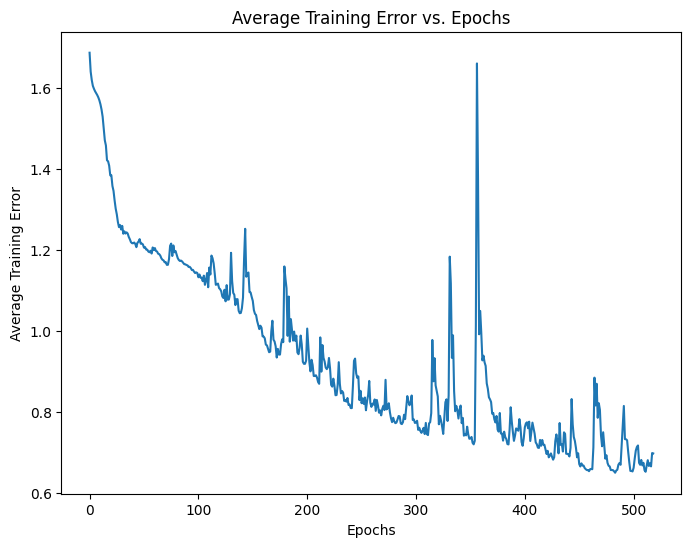

In [22]:
es1= EarlyStopping(monitor='loss',min_delta=0.0001, patience=35,verbose=1)
#Model Architecture 1
mask_value=0.0
model1 = Sequential()
model1.add(Masking(mask_value=mask_value, input_shape=(161, 2)))
model1.add(SimpleRNN(units=32,return_sequences=False))
model1.add(Dense(units=5, activation='softmax'))
model1.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
model1.summary()
history1=model1.fit(tensortrain, yt, callbacks=[es1],epochs=1000, batch_size=128)

#save Model weights
model1.save('/content/drive/MyDrive/DLA6/CV_SAVE_Model/11.h5')

#Evaluating the model
print('\nEvaluation of model on train data:')
trainAcc1=model1.evaluate(x=tensortrain,y=yt,batch_size=1, verbose="auto",callbacks=None)
print(model1.metrics_names)
print(trainAcc1)
print('\nEvaluation of model on test data:')
testAcc1=model1.evaluate(x=tensortest, y=ytest, batch_size=1, verbose="auto",callbacks=None)
print(model1.metrics_names)
print(testAcc1)


#Confusion Matrix
print('\nPredictions for test data:')
testProb1=model1.predict(tensortest, batch_size=1, verbose="auto", callbacks=None)
pred1=np.argmax(testProb1,axis=1)
confusionMatrix1=tf.math.confusion_matrix(ytest,pred1)
print(confusionMatrix1)


#Average Training Error vs. Epochs plotting
plt.figure(figsize=(8, 6))
#plt.plot(history8.history['accuracy'])
plt.plot(history1.history['loss'])
plt.title('Average Training Error vs. Epochs')
plt.ylabel('Average Training Error')
plt.xlabel('Epochs')
plt.show()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_1 (Masking)         (None, 161, 2)            0         
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 161, 32)           1120      
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 161, 32)           2080      
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 5)                 165       
                                                                 
Total params: 5,445
Trainable params: 5,445
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
3/3 [==============================] - 

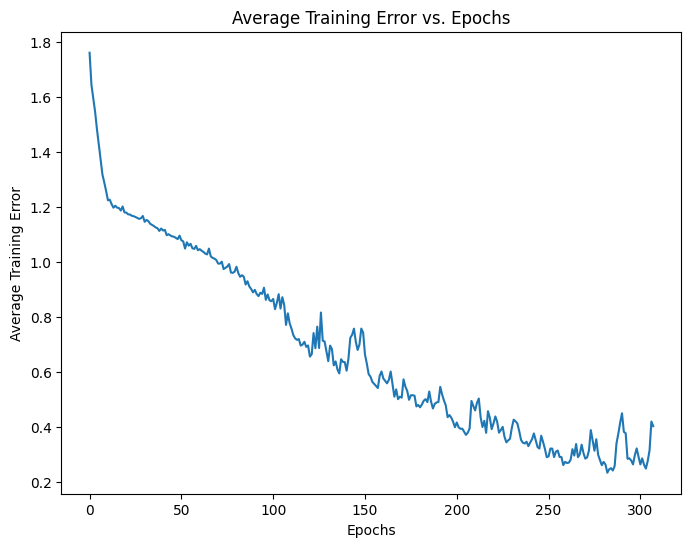

In [ ]:
es1= EarlyStopping(monitor='loss',min_delta=0.0001, patience=25,verbose=1)
#Model Architecture 1
mask_value=0.0
model1 = Sequential()
model1.add(Masking(mask_value=mask_value, input_shape=(161, 2)))
model1.add(SimpleRNN(units=32,return_sequences=True))
#model1.add(Dropout(0.2))
model1.add(SimpleRNN(units=32,return_sequences=True))
#model1.add(Dropout(0.2))
model1.add(SimpleRNN(units=32))
#model1.add(Dropout(0.2))
model1.add(Dense(units=5, activation='softmax'))
model1.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
model1.summary()
history1=model1.fit(tensortrain, yt, callbacks=[es1],epochs=1000, batch_size=128)

#save Model weights
model1.save('/content/drive/MyDrive/DLA6/CV_SAVE_Model24.h5')

#Evaluating the model
print('\nEvaluation of model on train data:')
trainAcc1=model1.evaluate(x=tensortrain,y=yt,batch_size=1, verbose="auto",callbacks=None)
print(model1.metrics_names)
print(trainAcc1)
print('\nEvaluation of model on test data:')
testAcc1=model1.evaluate(x=tensortest, y=ytest, batch_size=1, verbose="auto",callbacks=None)
print(model1.metrics_names)
print(testAcc1)


#Confusion Matrix
print('\nPredictions for test data:')
testProb1=model1.predict(tensortest, batch_size=1, verbose="auto", callbacks=None)
pred1=np.argmax(testProb1,axis=1)
confusionMatrix1=tf.math.confusion_matrix(ytest,pred1)
print(confusionMatrix1)


#Average Training Error vs. Epochs plotting
plt.figure(figsize=(8, 6))
#plt.plot(history8.history['accuracy'])
plt.plot(history1.history['loss'])
plt.title('Average Training Error vs. Epochs')
plt.ylabel('Average Training Error')
plt.xlabel('Epochs')
plt.show()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_5 (Masking)         (None, 161, 2)            0         
                                                                 
 simple_rnn_13 (SimpleRNN)   (None, 161, 32)           1120      
                                                                 
 dropout_9 (Dropout)         (None, 161, 32)           0         
                                                                 
 simple_rnn_14 (SimpleRNN)   (None, 161, 32)           2080      
                                                                 
 dropout_10 (Dropout)        (None, 161, 32)           0         
                                                                 
 simple_rnn_15 (SimpleRNN)   (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 5)                

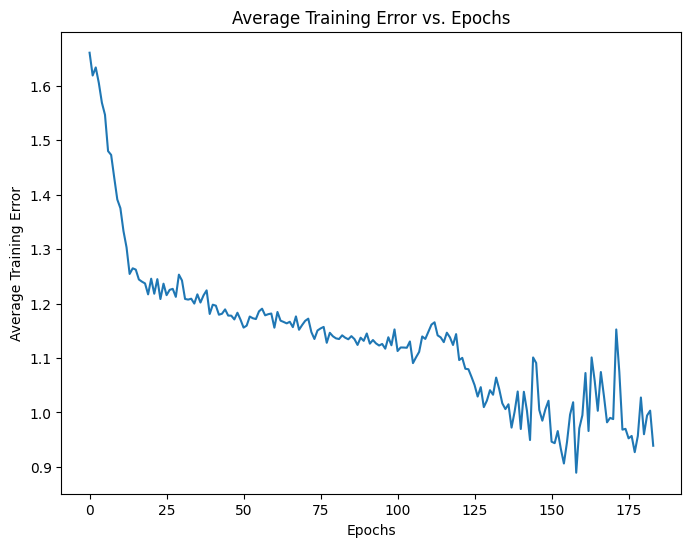

In [ ]:
es1= EarlyStopping(monitor='loss',min_delta=0.0001, patience=25,verbose=1)
#Model Architecture 1
mask_value=0.0
model1 = Sequential()
model1.add(Masking(mask_value=mask_value, input_shape=(161, 2)))
model1.add(SimpleRNN(units=32,return_sequences=True))
model1.add(Dropout(0.2))
model1.add(SimpleRNN(units=32,return_sequences=True))
model1.add(Dropout(0.2))
model1.add(SimpleRNN(units=32))
model1.add(Dropout(0.2))
model1.add(Dense(units=5, activation='softmax'))
model1.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
model1.summary()
history1=model1.fit(tensortrain, yt, callbacks=[es1],epochs=1000, batch_size=128)

#save Model weights
model1.save('/content/drive/MyDrive/DLA6/CV_SAVE_Model2.h5')

#Evaluating the model
print('\nEvaluation of model on train data:')
trainAcc1=model1.evaluate(x=tensortrain,y=yt,batch_size=1, verbose="auto",callbacks=None)
print(model1.metrics_names)
print(trainAcc1)
print('\nEvaluation of model on test data:')
testAcc1=model1.evaluate(x=tensortest, y=ytest, batch_size=1, verbose="auto",callbacks=None)
print(model1.metrics_names)
print(testAcc1)


#Confusion Matrix
print('\nPredictions for test data:')
testProb1=model1.predict(tensortest, batch_size=1, verbose="auto", callbacks=None)
pred1=np.argmax(testProb1,axis=1)
confusionMatrix1=tf.math.confusion_matrix(ytest,pred1)
print(confusionMatrix1)


#Average Training Error vs. Epochs plotting
plt.figure(figsize=(8, 6))
#plt.plot(history8.history['accuracy'])
plt.plot(history1.history['loss'])
plt.title('Average Training Error vs. Epochs')
plt.ylabel('Average Training Error')
plt.xlabel('Epochs')
plt.show()



Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_8 (Masking)         (None, 161, 2)            0         
                                                                 
 simple_rnn_22 (SimpleRNN)   (None, 161, 64)           4288      
                                                                 
 dropout_16 (Dropout)        (None, 161, 64)           0         
                                                                 
 simple_rnn_23 (SimpleRNN)   (None, 161, 64)           8256      
                                                                 
 dropout_17 (Dropout)        (None, 161, 64)           0         
                                                                 
 simple_rnn_24 (SimpleRNN)   (None, 64)                8256      
                                                                 
 dropout_18 (Dropout)        (None, 64)               

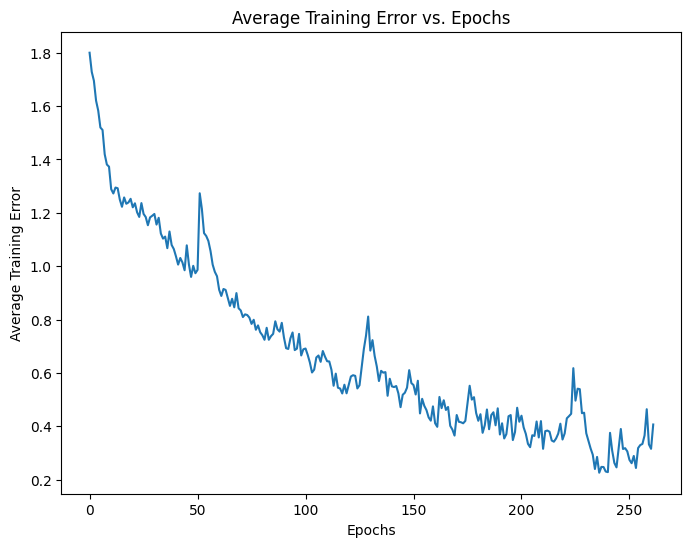

In [ ]:
es1= EarlyStopping(monitor='loss',min_delta=0.0001, patience=25,verbose=1)
#Model Architecture 2
mask_value=0.0
model1 = Sequential()
model1.add(Masking(mask_value=mask_value, input_shape=(161, 2)))
model1.add(SimpleRNN(units=64,return_sequences=True))
model1.add(Dropout(0.2))
model1.add(SimpleRNN(units=64,return_sequences=True))
model1.add(Dropout(0.2))
model1.add(SimpleRNN(units=64))
model1.add(Dropout(0.2))
model1.add(Dense(units=5, activation='softmax'))
model1.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
model1.summary()
history1=model1.fit(tensortrain, yt, callbacks=[es1],epochs=1000, batch_size=128)

#save Model weights
model1.save('/content/drive/MyDrive/DLA6/CV_SAVE_Model2.h5')

#Evaluating the model
print('\nEvaluation of model on train data:')
trainAcc1=model1.evaluate(x=tensortrain,y=yt,batch_size=1, verbose="auto",callbacks=None)
print(model1.metrics_names)
print(trainAcc1)
print('\nEvaluation of model on test data:')
testAcc1=model1.evaluate(x=tensortest, y=ytest, batch_size=1, verbose="auto",callbacks=None)
print(model1.metrics_names)
print(testAcc1)


#Confusion Matrix
print('\nPredictions for test data:')
testProb1=model1.predict(tensortest, batch_size=1, verbose="auto", callbacks=None)
pred1=np.argmax(testProb1,axis=1)
confusionMatrix1=tf.math.confusion_matrix(ytest,pred1)
print(confusionMatrix1)


#Average Training Error vs. Epochs plotting
plt.figure(figsize=(8, 6))
#plt.plot(history8.history['accuracy'])
plt.plot(history1.history['loss'])
plt.title('Average Training Error vs. Epochs')
plt.ylabel('Average Training Error')
plt.xlabel('Epochs')
plt.show()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_2 (Masking)         (None, 161, 2)            0         
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 161, 128)          16768     
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 161, 128)          32896     
                                                                 
 simple_rnn_8 (SimpleRNN)    (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 5)                 645       
                                                                 
Total params: 83,205
Trainable params: 83,205
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
3/3 [==============================] 

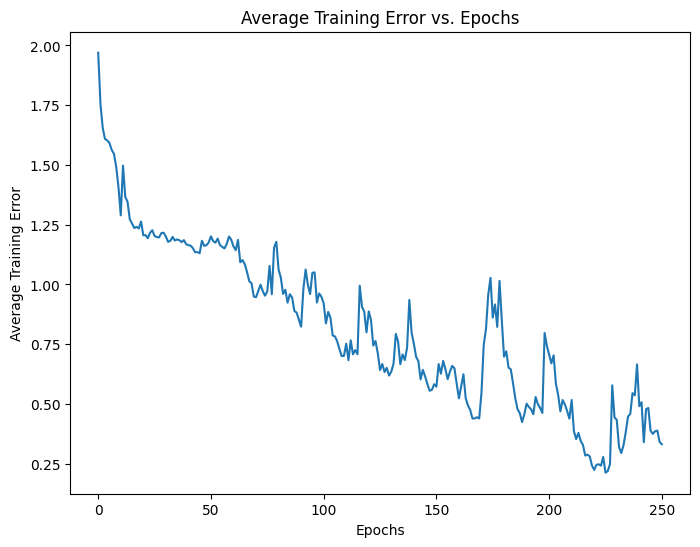

In [ ]:
es1= EarlyStopping(monitor='loss',min_delta=0.0001, patience=25,verbose=1)
#Model Architecture 3
mask_value=0.0
model1 = Sequential()
model1.add(Masking(mask_value=mask_value, input_shape=(161, 2)))
model1.add(SimpleRNN(units=128,return_sequences=True))
#model1.add(Dropout(0.2))
model1.add(SimpleRNN(units=128,return_sequences=True))
#model1.add(Dropout(0.2))
model1.add(SimpleRNN(units=128))
#model1.add(Dropout(0.2))
model1.add(Dense(units=5, activation='softmax'))
model1.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
model1.summary()
history1=model1.fit(tensortrain, yt, callbacks=[es1],epochs=1000, batch_size=128)

#save Model weights
model1.save('/content/drive/MyDrive/DLA6/CV_SAVE_Model32.h5')

#Evaluating the model
print('\nEvaluation of model on train data:')
trainAcc1=model1.evaluate(x=tensortrain,y=yt,batch_size=1, verbose="auto",callbacks=None)
print(model1.metrics_names)
print(trainAcc1)
print('\nEvaluation of model on test data:')
testAcc1=model1.evaluate(x=tensortest, y=ytest, batch_size=1, verbose="auto",callbacks=None)
print(model1.metrics_names)
print(testAcc1)


#Confusion Matrix
print('\nPredictions for test data:')
testProb1=model1.predict(tensortest, batch_size=1, verbose="auto", callbacks=None)
pred1=np.argmax(testProb1,axis=1)
confusionMatrix1=tf.math.confusion_matrix(ytest,pred1)
print(confusionMatrix1)


#Average Training Error vs. Epochs plotting
plt.figure(figsize=(8, 6))
#plt.plot(history8.history['accuracy'])
plt.plot(history1.history['loss'])
plt.title('Average Training Error vs. Epochs')
plt.ylabel('Average Training Error')
plt.xlabel('Epochs')
plt.show()



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_3 (Masking)         (None, 161, 2)            0         
                                                                 
 simple_rnn_9 (SimpleRNN)    (None, 161, 128)          16768     
                                                                 
 dropout_3 (Dropout)         (None, 161, 128)          0         
                                                                 
 simple_rnn_10 (SimpleRNN)   (None, 161, 128)          32896     
                                                                 
 dropout_4 (Dropout)         (None, 161, 128)          0         
                                                                 
 simple_rnn_11 (SimpleRNN)   (None, 128)               32896     
                                                                 
 dropout_5 (Dropout)         (None, 128)              

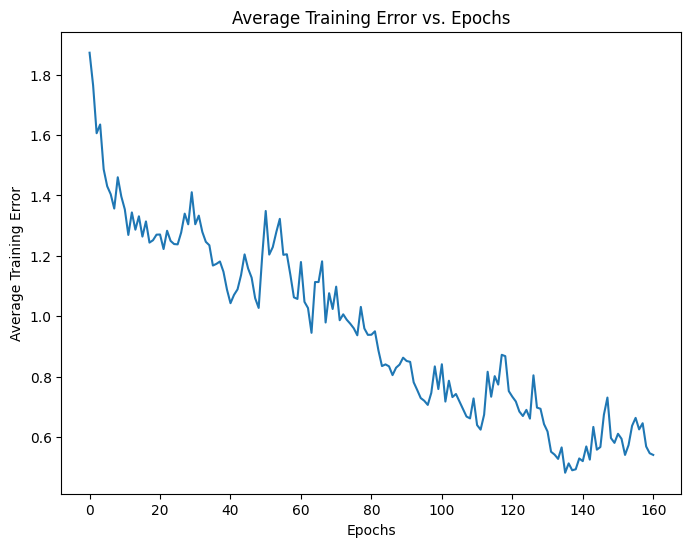

In [ ]:
es1= EarlyStopping(monitor='loss',min_delta=0.0001, patience=25,verbose=1)
#Model Architecture 3
mask_value=0.0
model1 = Sequential()
model1.add(Masking(mask_value=mask_value, input_shape=(161, 2)))
model1.add(SimpleRNN(units=128,return_sequences=True))
model1.add(Dropout(0.2))
model1.add(SimpleRNN(units=128,return_sequences=True))
model1.add(Dropout(0.2))
model1.add(SimpleRNN(units=128))
model1.add(Dropout(0.2))
model1.add(Dense(units=5, activation='softmax'))
model1.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
model1.summary()
history1=model1.fit(tensortrain, yt, callbacks=[es1],epochs=1000, batch_size=128)

#save Model weights
model1.save('/content/drive/MyDrive/DLA6/CV_SAVE_Model3.h5')

#Evaluating the model
print('\nEvaluation of model on train data:')
trainAcc1=model1.evaluate(x=tensortrain,y=yt,batch_size=1, verbose="auto",callbacks=None)
print(model1.metrics_names)
print(trainAcc1)
print('\nEvaluation of model on test data:')
testAcc1=model1.evaluate(x=tensortest, y=ytest, batch_size=1, verbose="auto",callbacks=None)
print(model1.metrics_names)
print(testAcc1)


#Confusion Matrix
print('\nPredictions for test data:')
testProb1=model1.predict(tensortest, batch_size=1, verbose="auto", callbacks=None)
pred1=np.argmax(testProb1,axis=1)
confusionMatrix1=tf.math.confusion_matrix(ytest,pred1)
print(confusionMatrix1)


#Average Training Error vs. Epochs plotting
plt.figure(figsize=(8, 6))
#plt.plot(history8.history['accuracy'])
plt.plot(history1.history['loss'])
plt.title('Average Training Error vs. Epochs')
plt.ylabel('Average Training Error')
plt.xlabel('Epochs')
plt.show()



Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_9 (Masking)         (None, 161, 2)            0         
                                                                 
 simple_rnn_25 (SimpleRNN)   (None, 161, 32)           1120      
                                                                 
 dropout_19 (Dropout)        (None, 161, 32)           0         
                                                                 
 simple_rnn_26 (SimpleRNN)   (None, 161, 32)           2080      
                                                                 
 dropout_20 (Dropout)        (None, 161, 32)           0         
                                                                 
 simple_rnn_27 (SimpleRNN)   (None, 32)                2080      
                                                                 
 dropout_21 (Dropout)        (None, 32)               

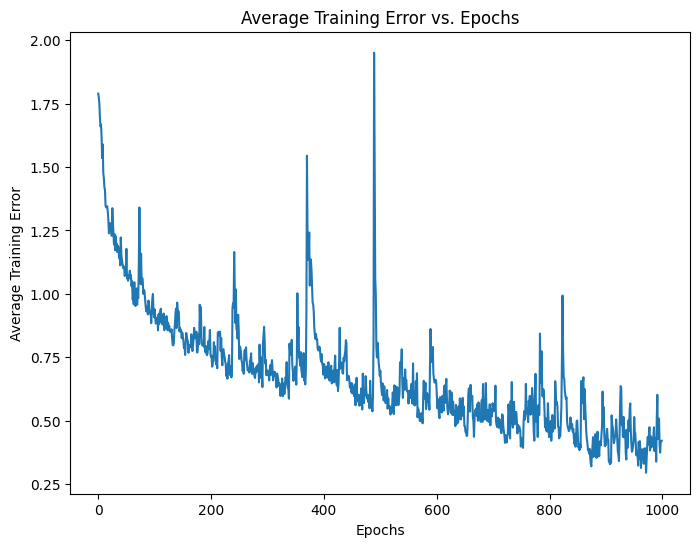

In [ ]:
#es1= EarlyStopping(monitor='loss',min_delta=0.0001, patience=25,verbose=1)
#Model Architecture 1
mask_value=0.0
model1 = Sequential()
model1.add(Masking(mask_value=mask_value, input_shape=(161, 2)))
model1.add(SimpleRNN(units=32,return_sequences=True))
model1.add(Dropout(0.2))
model1.add(SimpleRNN(units=32,return_sequences=True))
model1.add(Dropout(0.2))
model1.add(SimpleRNN(units=32))
model1.add(Dropout(0.2))
model1.add(Dense(units=5, activation='softmax'))
model1.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
model1.summary()
history1=model1.fit(tensortrain, yt,epochs=1000, batch_size=128)

#save Model weights
model1.save('/content/drive/MyDrive/DLA6/CV_SAVE_Model2100.h5')

#Evaluating the model
print('\nEvaluation of model on train data:')
trainAcc1=model1.evaluate(x=tensortrain,y=yt,batch_size=1, verbose="auto",callbacks=None)
print(model1.metrics_names)
print(trainAcc1)
print('\nEvaluation of model on test data:')
testAcc1=model1.evaluate(x=tensortest, y=ytest, batch_size=1, verbose="auto",callbacks=None)
print(model1.metrics_names)
print(testAcc1)


#Confusion Matrix
print('\nPredictions for test data:')
testProb1=model1.predict(tensortest, batch_size=1, verbose="auto", callbacks=None)
pred1=np.argmax(testProb1,axis=1)
confusionMatrix1=tf.math.confusion_matrix(ytest,pred1)
print(confusionMatrix1)


#Average Training Error vs. Epochs plotting
plt.figure(figsize=(8, 6))
#plt.plot(history8.history['accuracy'])
plt.plot(history1.history['loss'])
plt.title('Average Training Error vs. Epochs')
plt.ylabel('Average Training Error')
plt.xlabel('Epochs')
plt.show()



Streaming output truncated to the last 5000 lines.
3/3 [==============================] - 1s 254ms/step - loss: 1.1687 - accuracy: 0.4551
Epoch 2511/5000
3/3 [==============================] - 1s 242ms/step - loss: 1.1624 - accuracy: 0.4464
Epoch 2512/5000
3/3 [==============================] - 1s 251ms/step - loss: 1.1613 - accuracy: 0.4464
Epoch 2513/5000
3/3 [==============================] - 1s 253ms/step - loss: 1.1543 - accuracy: 0.5014
Epoch 2514/5000
3/3 [==============================] - 1s 254ms/step - loss: 1.1597 - accuracy: 0.4725
Epoch 2515/5000
3/3 [==============================] - 1s 256ms/step - loss: 1.1780 - accuracy: 0.4870
Epoch 2516/5000
3/3 [==============================] - 1s 243ms/step - loss: 1.1218 - accuracy: 0.4870
Epoch 2517/5000
3/3 [==============================] - 1s 257ms/step - loss: 1.1732 - accuracy: 0.4406
Epoch 2518/5000
3/3 [==============================] - 1s 248ms/step - loss: 1.1423 - accuracy: 0.4928
Epoch 2519/5000
3/3 [=================

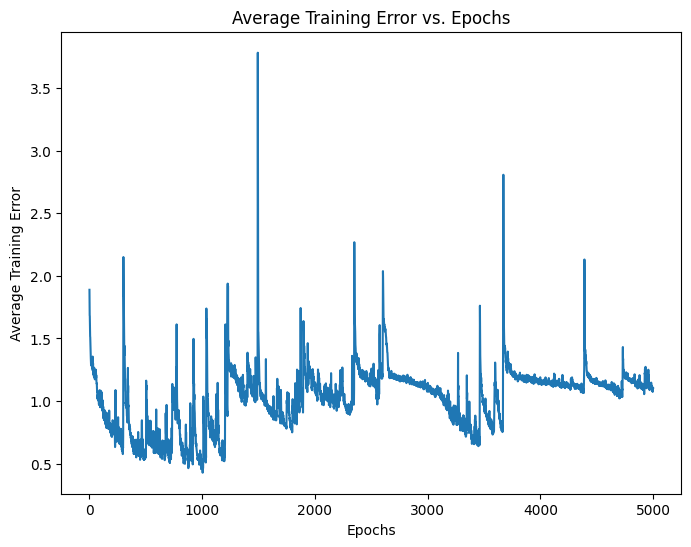

In [ ]:
#es1= EarlyStopping(monitor='loss',min_delta=0.0001, patience=25,verbose=1)
#Model Architecture 1
mask_value=0.0
model1 = Sequential()
model1.add(Masking(mask_value=mask_value, input_shape=(161, 2)))
model1.add(SimpleRNN(units=32,return_sequences=True))
model1.add(Dropout(0.2))
model1.add(SimpleRNN(units=32,return_sequences=True))
model1.add(Dropout(0.2))
model1.add(SimpleRNN(units=32))
model1.add(Dropout(0.2))
model1.add(Dense(units=5, activation='softmax'))
model1.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
model1.summary()
history1=model1.fit(tensortrain, yt,epochs=5000, batch_size=128)

#save Model weights
model1.save('/content/drive/MyDrive/DLA6/CV_SAVE_Model25000.h5')

#Evaluating the model
print('\nEvaluation of model on train data:')
trainAcc1=model1.evaluate(x=tensortrain,y=yt,batch_size=1, verbose="auto",callbacks=None)
print(model1.metrics_names)
print(trainAcc1)
print('\nEvaluation of model on test data:')
testAcc1=model1.evaluate(x=tensortest, y=ytest, batch_size=1, verbose="auto",callbacks=None)
print(model1.metrics_names)
print(testAcc1)


#Confusion Matrix
print('\nPredictions for test data:')
testProb1=model1.predict(tensortest, batch_size=1, verbose="auto", callbacks=None)
pred1=np.argmax(testProb1,axis=1)
confusionMatrix1=tf.math.confusion_matrix(ytest,pred1)
print(confusionMatrix1)


#Average Training Error vs. Epochs plotting
plt.figure(figsize=(8, 6))
#plt.plot(history8.history['accuracy'])
plt.plot(history1.history['loss'])
plt.title('Average Training Error vs. Epochs')
plt.ylabel('Average Training Error')
plt.xlabel('Epochs')
plt.show()

